In [1]:
!wget https://storage.googleapis.com/summer_school/ML_basics_student.zip

--2019-08-26 12:42:52--  https://storage.googleapis.com/summer_school/ML_basics_student.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1047835 (1023K) [application/zip]
Saving to: ‘ML_basics_student.zip’

ML_basics_student.z 100%[===================>]   1023K  --.-KB/s    in 0.008s  

2019-08-26 12:42:52 (119 MB/s) - ‘ML_basics_student.zip’ saved [1047835/1047835]



In [2]:
!unzip ML_basics_student.zip

Archive:  ML_basics_student.zip
   creating: ML_basics_student/
  inflating: ML_basics_student/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/ML_basics_student/
  inflating: __MACOSX/ML_basics_student/._.DS_Store  
   creating: ML_basics_student/.ipynb_checkpoints/
  inflating: ML_basics_student/.ipynb_checkpoints/ML_basics_1_student-checkpoint.ipynb  
  inflating: ML_basics_student/.ipynb_checkpoints/ML_basics_1_teacher-checkpoint.ipynb  
  inflating: ML_basics_student/.ipynb_checkpoints/ML_basics_2_student-checkpoint.ipynb  
  inflating: ML_basics_student/.ipynb_checkpoints/ML_basics_2_teacher-checkpoint.ipynb  
  inflating: ML_basics_student/adspy_shared_utilities.py  
  inflating: __MACOSX/ML_basics_student/._adspy_shared_utilities.py  
  inflating: ML_basics_student/fruit_data_with_colors.txt  
  inflating: __MACOSX/ML_basics_student/._fruit_data_with_colors.txt  


In [0]:
!mv ML_basics_student/* .

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  import sys


In [5]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
len(fruits)

59

In [7]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

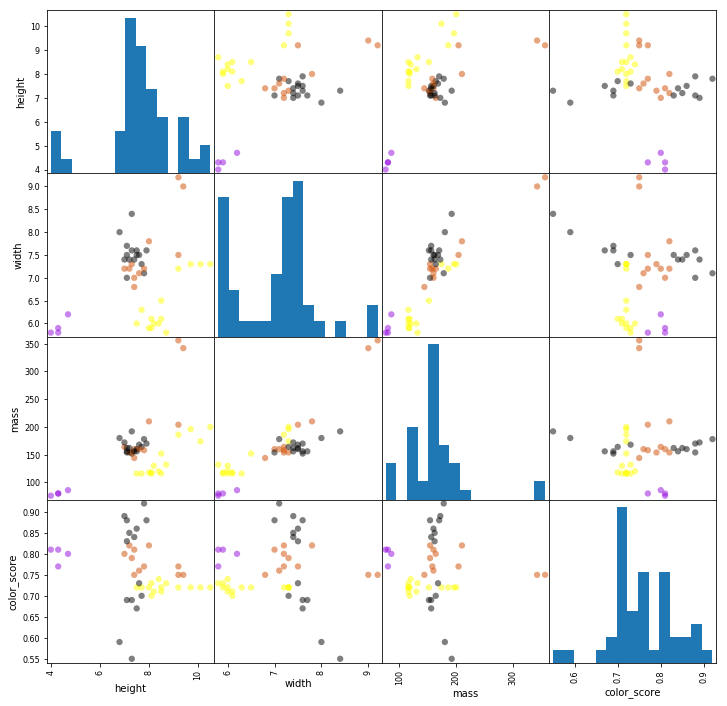

In [8]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', 
                                     s=40, hist_kwds={'bins':15}, figsize=(12,12), cmap=cmap)

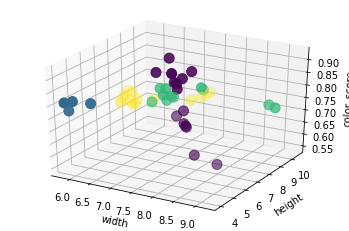

In [9]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
scatter = ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], 
                     c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [0]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

### Train the classifier (fit the estimator) using the training data

In [0]:
knn.fit(X_train, y_train)

### Estimate the accuracy of the classifier

In [0]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

### Plot the decision boundaries of the k-NN classifier

In [0]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

### Task 1: How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

In [0]:
# create code that will calculate test set prediction accuracy for k = 1,2,...,20. 
# Then plot the results (accuracy vs. k)

### Task 2: How sensitive is k-NN classification accuracy to the train/test split proportion?

In [0]:
# create code that will calculate test set prediction accuracy for different train/test set ratios. 
# For each ratio, perform more (let's say 100) different random train/test splits and average these 100 results.
# Then plot the results (accuracy vs. ratio)

### Task 3: Why is the accuracy lower than we expected?